### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data sources

In [4]:
assessments_raw = pd.read_csv("dataset/assessments.csv")
courses_raw = pd.read_csv("dataset/courses.csv")
student_assessment_raw = pd.read_csv("dataset/studentAssessment.csv")
student_info_raw = pd.read_csv("dataset/studentInfo.csv")
student_registration_raw = pd.read_csv("dataset/studentRegistration.csv")
# If this is failing, ensure that you have downloaded the dataset and copied studentVle.csv 
# to the dataset folder.
student_vle_raw = pd.read_csv("dataset/studentVle.csv") 
vle_raw = pd.read_csv("dataset/vle.csv")

In [3]:
student_vle_raw.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


I had skipped over this detail before, but... there's negative date values! Do we want to remove them from our overall data, or keep them? It might be interesting to see which students interacted with course pages before the class even started (like visiting the course homepage to remind themselves about the primary details of the class?), or it might add a weird variable. Thoughts? -Susannah

# Exploratory Data Analysis

## Describe columns

In [4]:
assessments_raw.describe(include='all')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,195.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.005128,20.873786
std,NaN,NaN,10098.625521,NaN,76.001119,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,71.000000,0.000000
50%,NaN,NaN,25364.500000,NaN,152.000000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000


In [5]:
courses_raw.describe(include='all')

,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000


In [6]:
student_assessment_raw.describe(include='all')

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [7]:
student_info_raw.describe(include='all')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


In [8]:
student_registration_raw.describe(include='all')

,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32548.000000,10072.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.411300,49.757645
std,NaN,NaN,5.491673e+05,49.260522,82.460890
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-2.000000
50%,NaN,NaN,5.903100e+05,-57.000000,27.000000
75%,NaN,NaN,6.444530e+05,-29.000000,109.000000


Another interesting negative date situation here. It makes sense that most registration dates are negative, as most students will have registered before the class term begins. I'm not sure what's going on where the minimum unregistration value is lower than the minimum registration value, and that may hint at some additional data cleaning needs. -Susannah

In [9]:
student_vle_raw.describe(include='all')

,code_module,code_presentation,id_student,id_site,date,sum_click
count,10655280,10655280,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
unique,7,4,NaN,NaN,NaN,NaN
top,FFF,2014J,NaN,NaN,NaN,NaN
freq,4014499,3619452,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,NaN,NaN,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,NaN,NaN,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,NaN,NaN,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,NaN,NaN,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,NaN,NaN,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00


In [10]:
vle_raw.describe(include='all')

,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,6.364000e+03,6364,6364,6364,1121.000000,1121.000000
unique,NaN,7,4,20,NaN,NaN
top,NaN,FFF,2013J,resource,NaN,NaN
freq,NaN,1967,1772,2660,NaN,NaN
mean,7.260991e+05,NaN,NaN,NaN,15.204282,15.214987
std,1.283151e+05,NaN,NaN,NaN,8.792865,8.779806
min,5.267210e+05,NaN,NaN,NaN,0.000000,0.000000
25%,6.615928e+05,NaN,NaN,NaN,8.000000,8.000000
50%,7.300965e+05,NaN,NaN,NaN,15.000000,15.000000
75%,8.140162e+05,NaN,NaN,NaN,22.000000,22.000000


## Histograms and Bar Charts

### Helper EDA functions

In [17]:
def explore_numeric_hist(df, col_name, axis):
    _,_, patches = axis.hist(df[col_name])
    axis.set_title(col_name)
    axis.set_ylabel("count")

    # add in labels
    max_tick = max(np.abs(axis.get_yticks()))
    for p in patches:
        x,_ = p.get_xy()
        y = p.get_height()
        width = p.get_width()
        #if y == 0:
        if y - max_tick*0.07 < 0:
            v_adjust = max_tick*0.01
            color = 'black'
        else:
            v_adjust = -max_tick*0.07
            color='white'
        axis.text(x+width/2,y+ v_adjust,str(y), ha='center', color=color)

def explore_bar(df, col_name, axis):
    df[col_name].value_counts().plot(kind='bar',ax=axis)
    axis.set_title(col_name)
    axis.set_ylabel("count")
    
    # add in labels
    patches = axis.patches
    max_tick = max(np.abs(axis.get_yticks()))
    for p in patches:
        x,_ = p.get_xy()
        y = p.get_height()
        width = p.get_width()
        #if y == 0:
        if y - max_tick*0.07 < 0:
            v_adjust = max_tick*0.01
            color = 'black'
        else:
            v_adjust = -max_tick*0.07
            color='white'
        axis.text(x+width/2,y+ v_adjust,str(y), ha='center', color=color)

def explore_col(df, col_name, axis):
    if (pd.api.types.is_string_dtype(df[col_name])):
        explore_bar(df, col_name, axis)
        return
    if (pd.api.types.is_numeric_dtype(df[col_name])):
        explore_numeric_hist(df, col_name, axis)
        return

def explore_df(df, num_display_cols=4, single_chart_width=6, single_chart_height=4):
    #num_cols = num_display_cols
    num_cols_total = len(df.columns)
    num_display_rows = num_cols_total//num_display_cols +1
    fig, axs = plt.subplots(num_display_rows, num_display_cols)
    fig.set_size_inches((single_chart_width*num_display_cols, single_chart_height*num_display_rows))
    fig.subplots_adjust(hspace=1)

    axes_index = 0
    for col in df.columns:
        if num_cols_total >= num_display_cols:
            curr_axs = axs[axes_index//num_display_cols, axes_index%num_display_cols]
        else:
            curr_axs = axs[axes_index]
        explore_col(df, col, curr_axs)
        axes_index += 1
    
    # remove excess plots
    for index in range(num_cols_total, num_display_cols*num_display_rows):
        if num_cols_total >= num_display_cols:
            curr_axs = axs[index//num_display_cols, index%num_display_cols]
        else:
            curr_axs = axs[index]
        fig.delaxes(curr_axs)



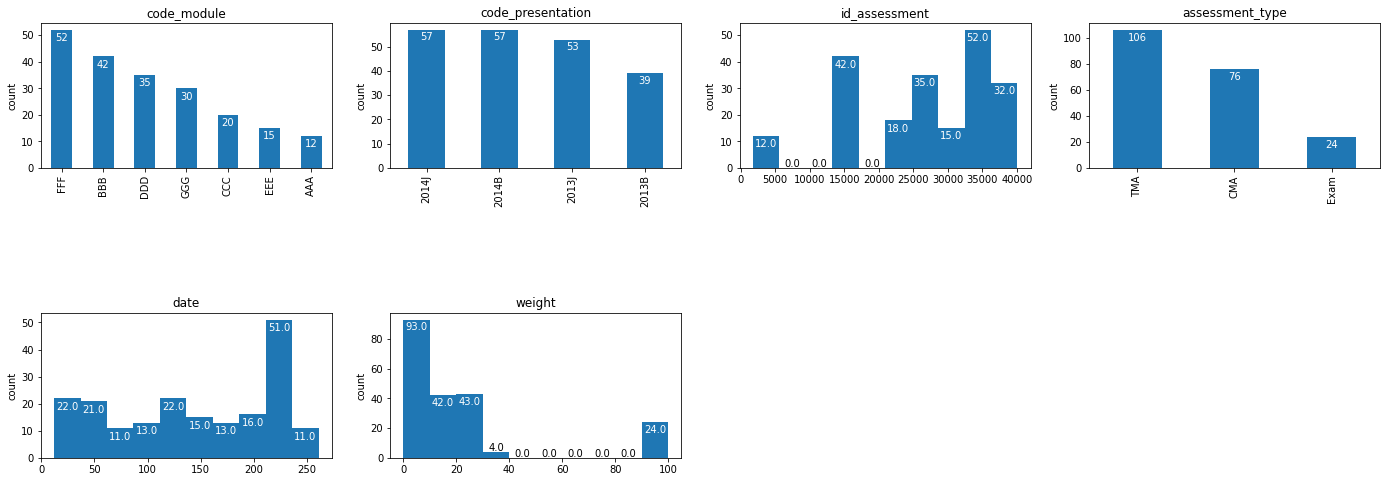

In [18]:
explore_df(assessments_raw)

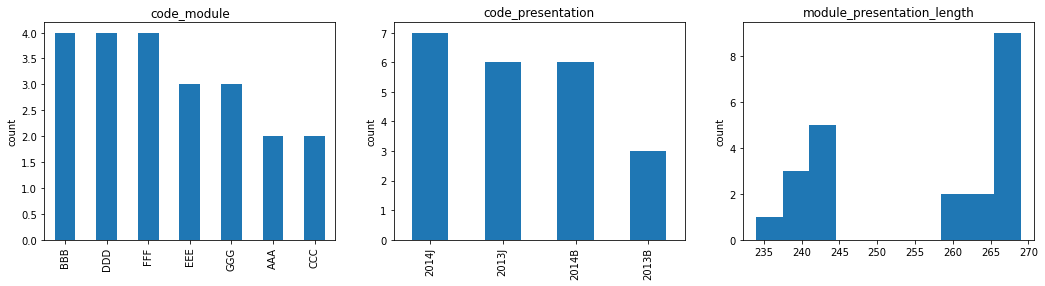

In [13]:
explore_df(courses_raw)

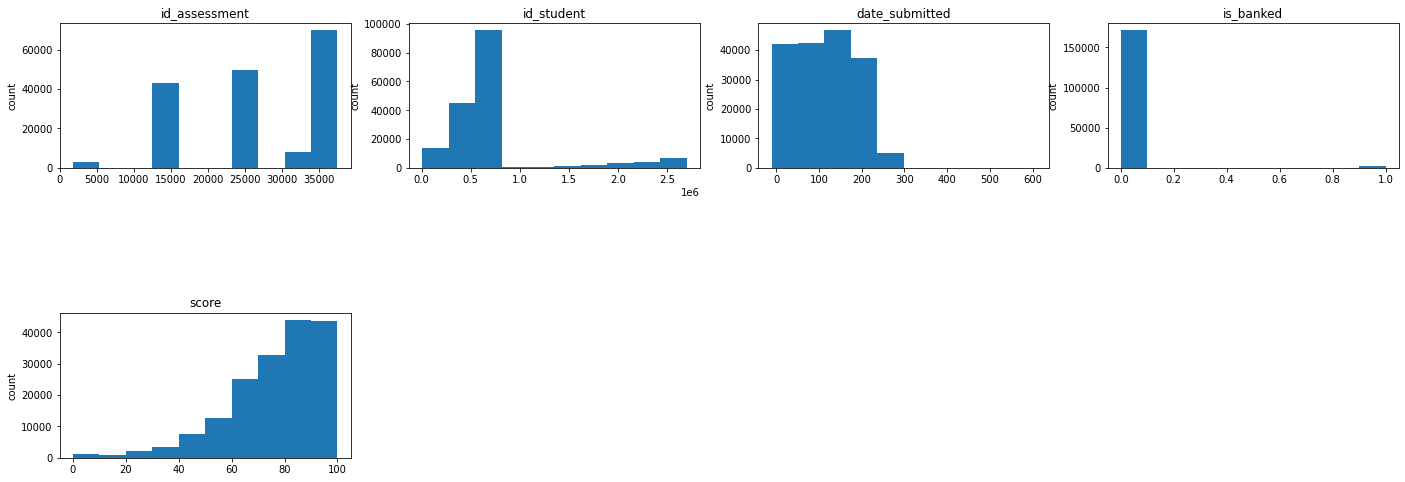

In [14]:
explore_df(student_assessment_raw)

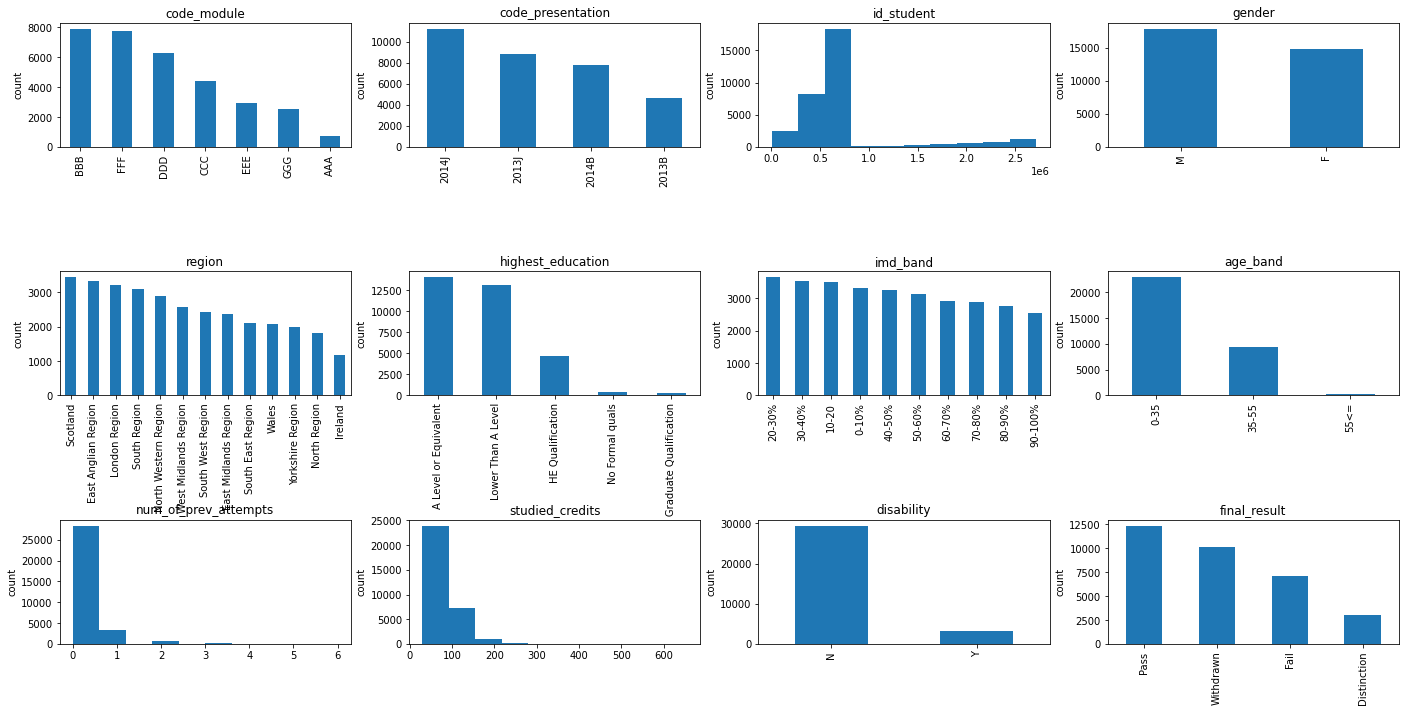

In [15]:
explore_df(student_info_raw)

Not sure how much, if anything, to do with `region`, unless we want to normalize by population (which sounds like way more trouble than it's worth.) I think the `final_result` chart is particularly informative - that's a LOT of students that withdrew. -Susannah

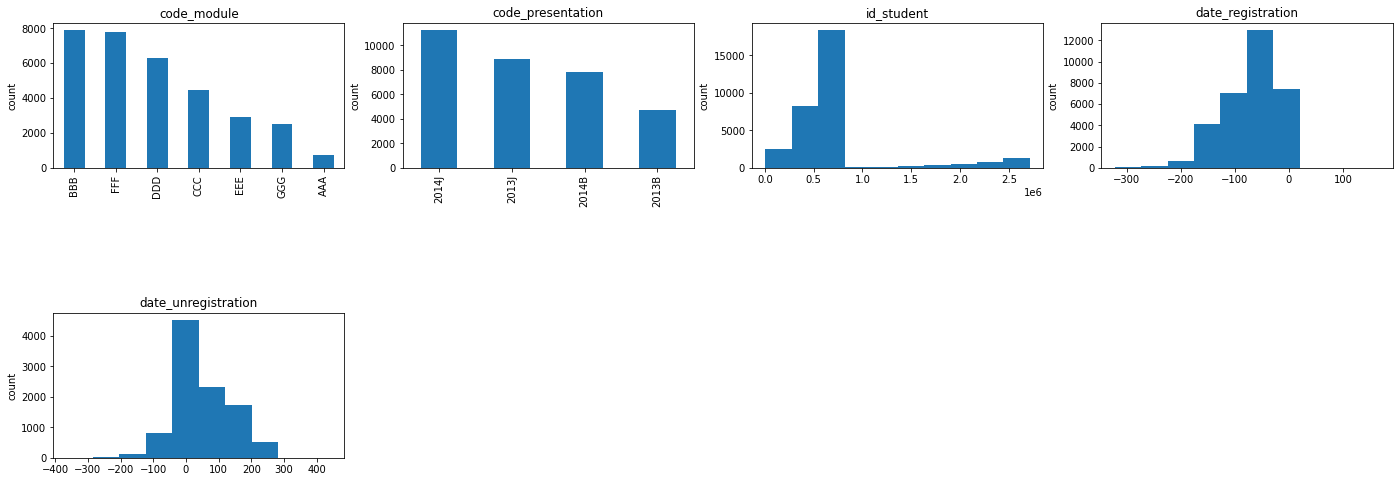

In [16]:
explore_df(student_registration_raw)

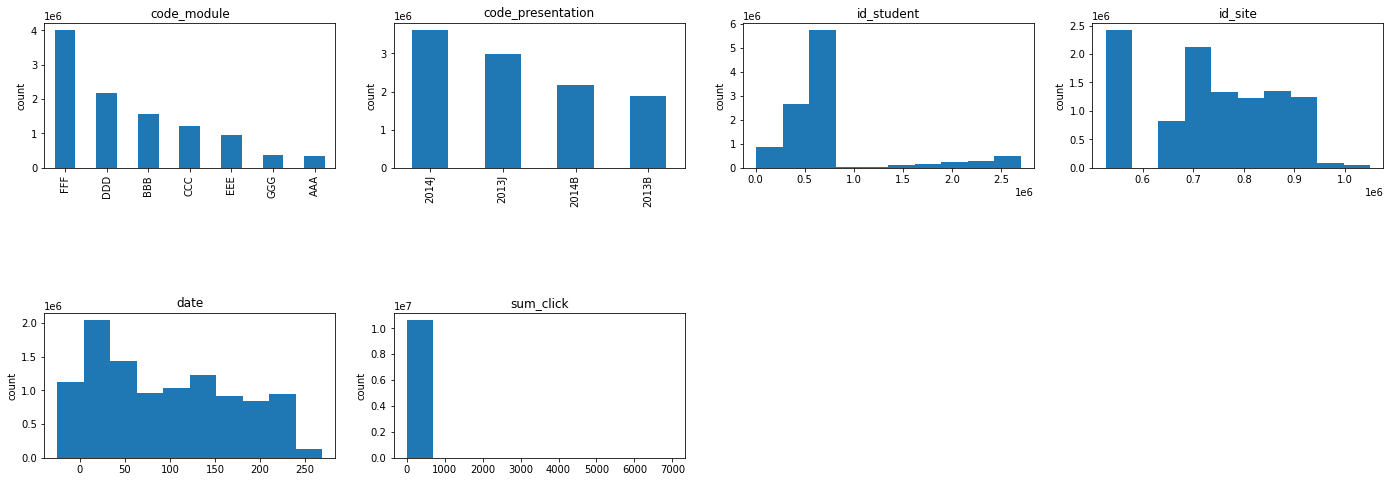

In [17]:
explore_df(student_vle_raw)

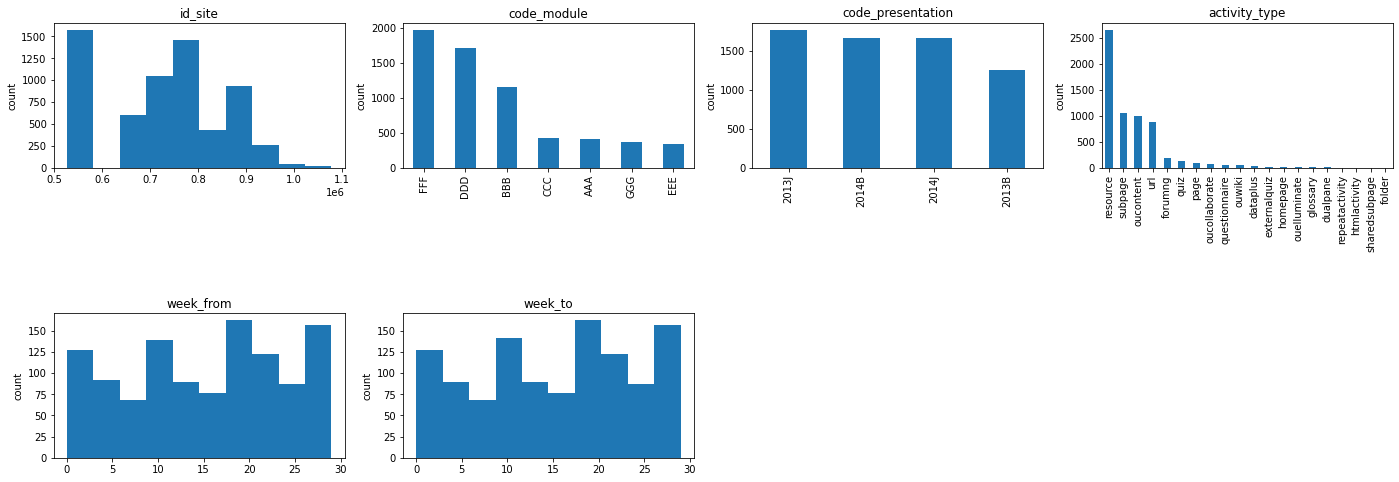

In [18]:
explore_df(vle_raw)

## Identify Outliers

## Identify Correlations between attributes

## Feature Engineering Investigation